# Graph Convolutioal Network (GCN)


## What is Graph?

### Graph Data
Many important real-world datasets come in the form of graphs or networks: social networks, knowledge graphs, protein-interaction networks, the World Wide Web, etc. (just to name a few).



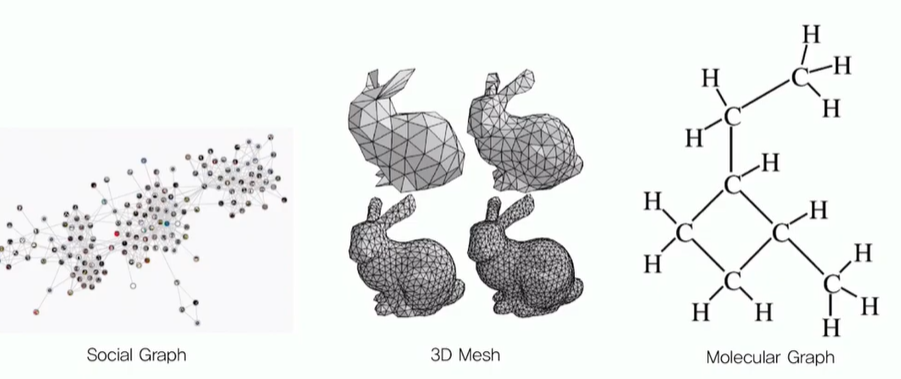

 대부분의 머신러닝 알고리즘은 입력 데이터가 유클리디안 공간 (Euclidean space)에 존재함을 가정하고 있다. 즉, 통계 데이터나 이미지처럼 입력 데이터가 벡터의 형태로 표현될 수 있어야 한다. 그러나 소셜 네트워크, 관계형 데이터베이스, 분자 구조 등과 같이 객체들과 그 객체들 간의 관계로 표현되는 데이터는 기본적으로 위와 같은 그래프로 표현된다.

 또한, 만약 사용자나 원자의 속성, 연결의 종류 등을 고려해야하는 경우에는 단순히 node와 edge로 이루어진 그래프가 아니라, node feature matrix와 edge feature matrix가 추가된 속성 그래프 (attributed graph)로 데이터를 표현해야 한다. 이러한 형태의 그래프 데이터는 유클리드 공간에 존재하지 않으며, 직접적인 방식으로 벡터의 형태로 변환하는 것 또한 불가능하다. 따라서, 벡터 형태의 입력 데이터를 가정하는 기존의 인공신경망 (Artificial Neural Network, ANN)으로는 분자 구조와 같은 그래프 형태의 데이터를 처리할 수 없다는 문제점이 존재한다.

(+)
행동 인식 분야에서 가장 핫하게 등장하는 네트워크가 바로 GCN(Graph Convolutional Networks)이다. GCN은 쉽게 설명하자면, 어떤 그래프 구조를 이미지 convolution과 유사한 방식으로 연산해서 특징점을 추출하는 네트워크라고 보면 될 것 같다. 사람의 몸도 어떻게 보면 각 관절과 그 관절들이 연결되어있는 구조로 그래프 구조라고 볼 수 있다. 그렇기 때문에 GCN을 사용한 논문들에서도 좋은 성능을 보이고 있다. 

> ref: [(AAAI-2018) Spatial Temporal Graph Convolutional Networks for Skeleton-Based Action Recognition]([https://arxiv.org/abs/1801.07455)

### Graph Structure

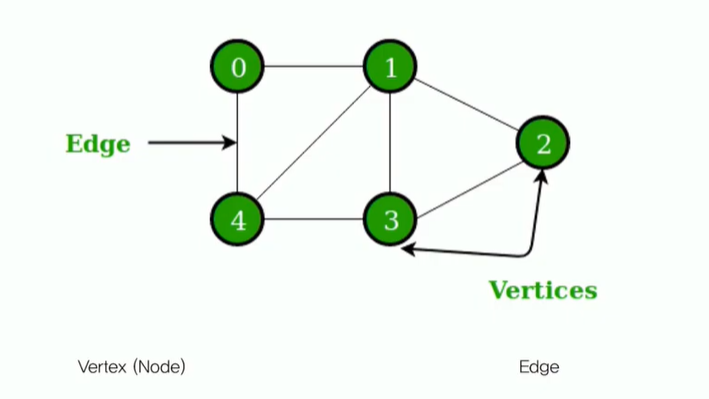

- Graph는 vertex(node)와 edge로 이루어져있다. 이 때 node는 한 input data를 의미하고 edge는 두 데이터 간의 relationship을 의미한다. (어차피 같은 의미이지만 앞으로는 vertex 대신 node라는 표현을 많이 사용할 것이다.)
    - 소셜 그래프에서 node는 사람, edge는 두 사람 사이의 관계를 의미한다.
    - Weighted Grapgh vs. Unweighted Graph
    - Directed Graph vs. Undirected Graph 
    - (참고) 위의 그래프의 경우 방향성이 존재하지 않는 undirected Graph이다.

#### `-` Adgacency matrix & Feature matrix

모든 노드간의 relationship 정보를 담고있도록 data를 표현해야하므로 이 정보들은 **1. Adgacency matrix**로 나타낼 수 있다. 또한 노드간의 relationship정보 말고도 node 자체가 가지고 있는 feature 정보가 있으므로 이는 **2. Feature matrix**로 나타낸다.

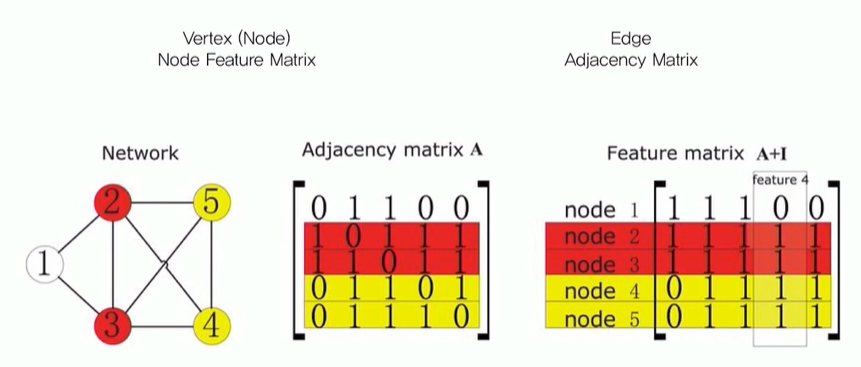

`1` **Network(Graph data) $\to$ Adjacency matrix**


- $n$ 개의 노드가 있다면 Adjacency matrix는 $n\times n$ 크기를 갖게 된다.
    - 5개의 노드가 있으므로 $5\times 5$ Adjacency matrix

- $\bf{A}_{ij}$ : Adjacency matrix의 $i$번째 row와 $j$번째 컬럼에 있는 값을 나타내며, $i$번째 노드와 $j$번째 노드가 서로 연결이 되어 있는지를 나타낸다.
    - 노드 사이에 엣지가 있는지? (있으면 $1$, 없으면 $0$)

`2` **Feature matrix**

- Feature matirx로 각 노드의 정보를 나타낸다.

    - Feature matrix의 크기는 $n(\text{노드의 수}) \times f(\text{feature 개수})$ 이며, $f$는 설정함에 따라서 많아질 수도 있고 적어질 수도 있는 값이다.
    
    - feature matrix를 $\bf{X}$ 라고 하자, 이 때 $\bf{X}_{ij}$ 가 의미하는 것은 i번째 노드에 j번째 feature가 무엇인지 나타내는 것이다.

## GCN (Graph Convolutional Network)

데이터의 구조를 고려해야 한다는 점은 이미지뿐만 아니라 그래프 데이터에서도 매우 중요하기 때문에 이미지에 대한 convolution을 일반화하여 그래프 데이터에 적용하기 위한 연구가 머신러닝 분야에서 활발히 진행되었다. 그래프 합성곱 신경망 (Graph Convolutional Network, GCN)은 이미지에 대한 convolution을 그래프 데이터로 확장한 머신러닝 알고리즘이다.

*이부분에 대해 이해를 하려면 먼저 CNN에 이해가 필요할 것 같다.*

### Convolutional Layer

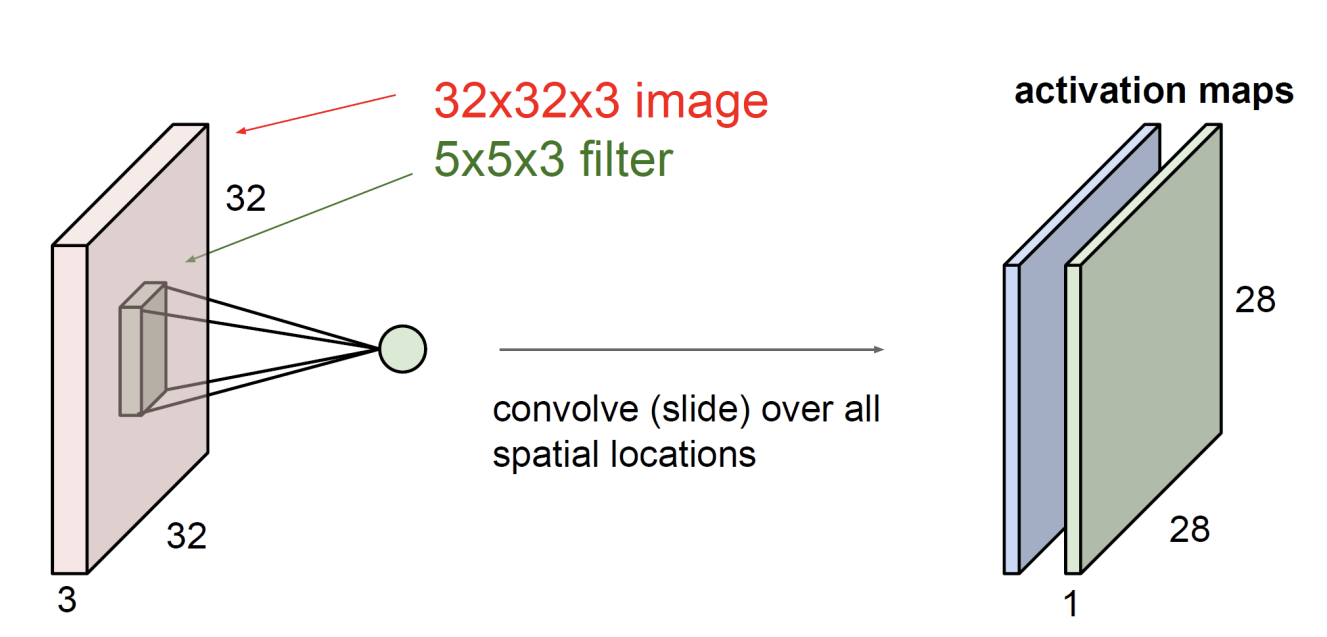

#### `-` Weight sharing

- Reduce the number of parameters
$\to$ less overfitting, low computational cost
- Learn local features
- Translation invariance

### What should we update?
어쨌든 얘도 convolutional network니까 CNN을 보고 이것을 이미지가 아닌 그래프에 적용시켜본다면 구조를 어떻게 바꿔야 할지지 생각해보자.

- CNN updates values in activation map in each layer.
Values of activation map determine the state of image.

- Values of each node feature determine the state of graph. $\to$ Make each layer of network update values of each node feature

그래프의 정보를 결정하는 것은 무엇일까? 이미지는 activation map에 있는 value들이 그 이미지에 담긴 상태가 뭔지, 이미지에 담긴 정보가 뭔지를 결정을 하는 값들이었는데 그래프 같은 경우에는 각 노드에 담긴 value 즉, node feature matrix 안에 담긴 정보가 업데이트 되도록 하면 되겠다.

결국 중요한 것은 Graph Convolutional Layer를 거치게 되면 노드 피처에 담긴 값이 업데이트가 되어야 한다는 것을 convolutional network를 통해 알 수 있었다.

***그렇다면 어떤 방식으로 업데이트를 해야 타당할까?***


어쨌든 이것도 컨볼루션이니까 컨볼루션은 어떤 작은 웨이트를 쭉 이동시키는 연산이었는데 중요한 특성은 Weight sharing을 한다는 것이었고, 어떤 로컬한 이 값 근처에 있는 값들만 weight에 들어가서 로컬한 피처를 배운다는 것이 또 하나의 특징이었다. 그래서 그 뉴런이 receptive field를 갖게 된다. (어떤 전체의 데이터에 정보를 하나의 뉴런이 다 받는게 아니라 어떤 로컬한 부분에 있는 정보를 이제 뉴런이 받게 되고 이를 receptive field 라고 한다.)

그런 특성을 그럼 그래프에는 어떻게 적용시켜야 될까?
노드의 피처를 계속 업데이트 한다는 것은 각 노드의 정보를 업데이트 하는 것 그래서 노드 피처 매트릭스를 다시 그려보면 $n$개의 노드가 있는 그래프일 때 $n\times f\text{(feature 개수)}$의 shape을 갖고 이 matrix의 i번째 row가 의미하는 것은 i번째 노드의 피처/상태/정보를 담고있다고 앞에서 배웠다.

아까 말했듯이 layer를 하나 거쳐서 이 node feature matrix를 업데이트 한다는 것은 이 각각의 row를 즉, 각각의 노드의 정보를 업데이트 해주면 될 것 같다. 

그럼 어떤 방식으로 업데이트를 할 거냐? convolution network 같이 그 주변에 있는 애들의 정보만 받아서 업데이트를 하자 이런식으로 생각해 볼 수 있을 것 같다.

### How to update hidden states in GCN

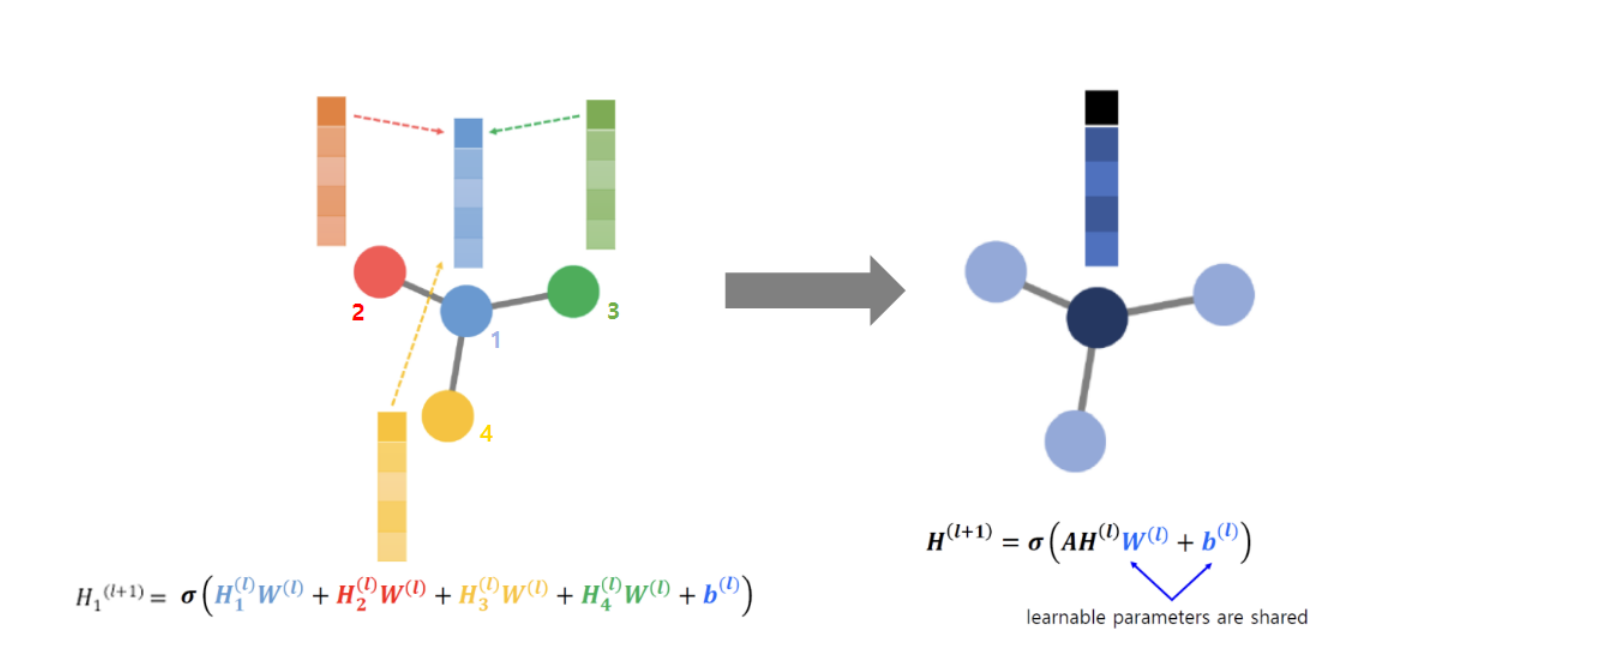

$$H_1^{(l+1)} = \sigma(H_1^{(l)}W^{(l)} + H_2^{(l)}W^{(l)} + H_3^{(l)}W^{(l)} + H_4^{(l)}W^{(l)} + b^{(l)})$$

$$\Rightarrow H_i^{(l+1)} = \sigma\Big(\sum_{j\in N(i)} H_j^{(l)}W^{(l)} + b^{(l)} \Big)$$

$$W: \text{weight},\quad W^{(l)}: l\text{번째 layer의 weight},\quad H:\text{hidden state}, \quad \sigma: \text{activation function}$$

*(참고) 여기서는 node feature matrix를 hidden state라고 부를 것임*

위의 그림과 같은 그래프가 있다고 가정해보자. 그래프의 번호가 1번, 2번, 3번, 4번 이런식으로 붙여졌다고 할 때 $H_1^{(l+1)}$, 즉 하나의 $(l+1)$번 째 layer를 통과하게 되면 $H_1$의 정보는 자기 자신의 웨이트를 더하고, 그 다음에 연결되어 있는 $H_2$의 hidden state에 weight를 곱하고, $H_3$의 hidden state에 weight를 곱하고 $H_4$의 hidden state에 weight를 곱하고 bias를 더해서 activation을 거쳐서 다음 layer의 값을 업데이트 하면 되겠다.

이렇게 되면 이제 convolutional layer처럼 어떤 local한 feature를 뽑아낼 수 있고, 그럼 이 다음 노드가 받은 것은 1번, 2번, 3번, 4번 노드의 정보만 받아서 다음 뉴런에 전달을 해주는 것이고, 연결되지 않은 5번, 6번, 7번에 대해서는 들어가지 않았으니까 1번 노드의 정보는 1번 노드의 근처에 있는 로컬한 정보를 뽑아냈다라고 볼 수 있다.

또한 이 weight가 다 똑같기 때문에 weight sharing을 한다. 즉, 전체가 다 연결되어 있는게 아니라 어쨌든 얘도 어떤 노드의 정보는 그 구조가 다 비슷할 것이다. 왜냐하면 처음에 같은 이 feature의 순서가 똑같았으니까 거기에 어차피 애들도 다 비슷한 애들이니까 같은 weight를 곱해서 general한 정보를 뽑아낼 수 있게 마치 LSTM에서 각각의 워드에 다 똑같은 weight를 곱해줬던 것 처럼(왜냐하면 이 word는 다 비슷한 특성을 가지고 있기 때문에) 얘들도 각각의 노드 피처가 비슷한 성격을 띄고 있을 거니까 같은 weight를 sharing해서 곱해줘서 computational cost도 낮추고 efficiency도 높일 수 있겠다.

그래서 이런식으로 업데이트 하면 아까 convolutional layer의 두 가지 특성이였던 weight sharing과 local feature를 뽑아낸다는 것 둘 다 가지고 있게 됐다. 

실질적으로 구현할 때 1번 노드에 연결되었는지 다 보고, 1번노드와 연결되어 있는 애들을  weight 타고 다 더한다음에 2번노드로 가서 2번노드에 뭐가 연결되어있는지 다 보고, 그 다음에 종합해서 업데이트 하고, 3번노드 뭐랑 연결되어있는지 다 보고,,이렇게 할 수는 없겠죠.(for문을 엄청나게 많이 사용해서 속도가 느려질 것이다.)

그러면 우리가 graph structure를 adjacency matrix로 나타내는데 그럼 이 adjacency matrix가 결국은 connectivity를 담고있는 매트릭스이다. 그럼 이것을 어떻게 잘 활용하면 한번에 행렬연산으로 할 수 있을 것 같다. (행렬 연산은 gpu가 빠르게 잘함)

`-` 예제

*자기자신과 연결되어있다고 가정, feature의 개수도 임의로 10으로 지정*

*보기 쉽게 node feature matrix를 H라고 놓자. (오른쪽 matrix가 H임)*

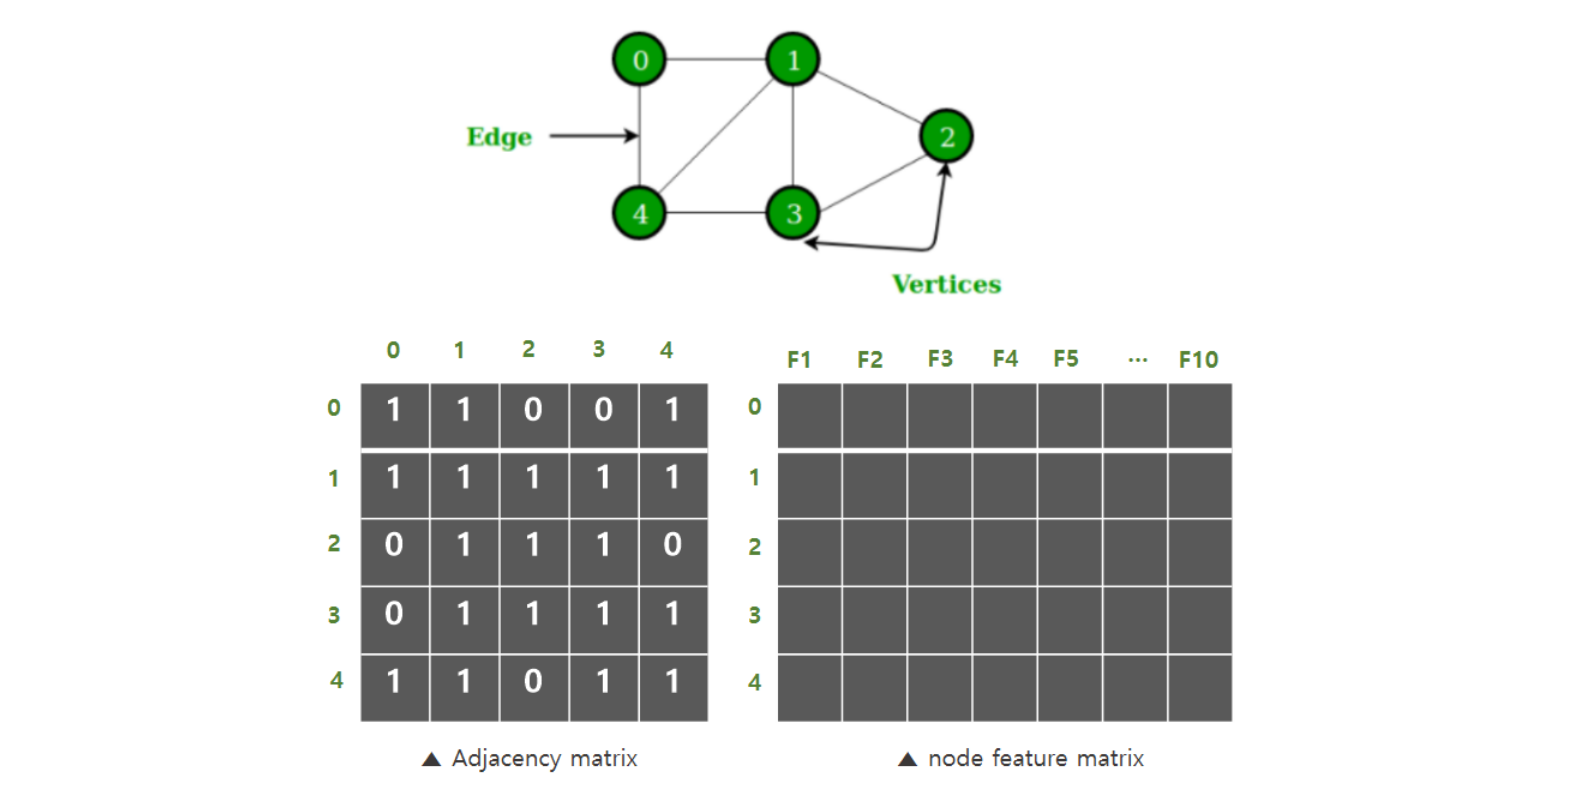

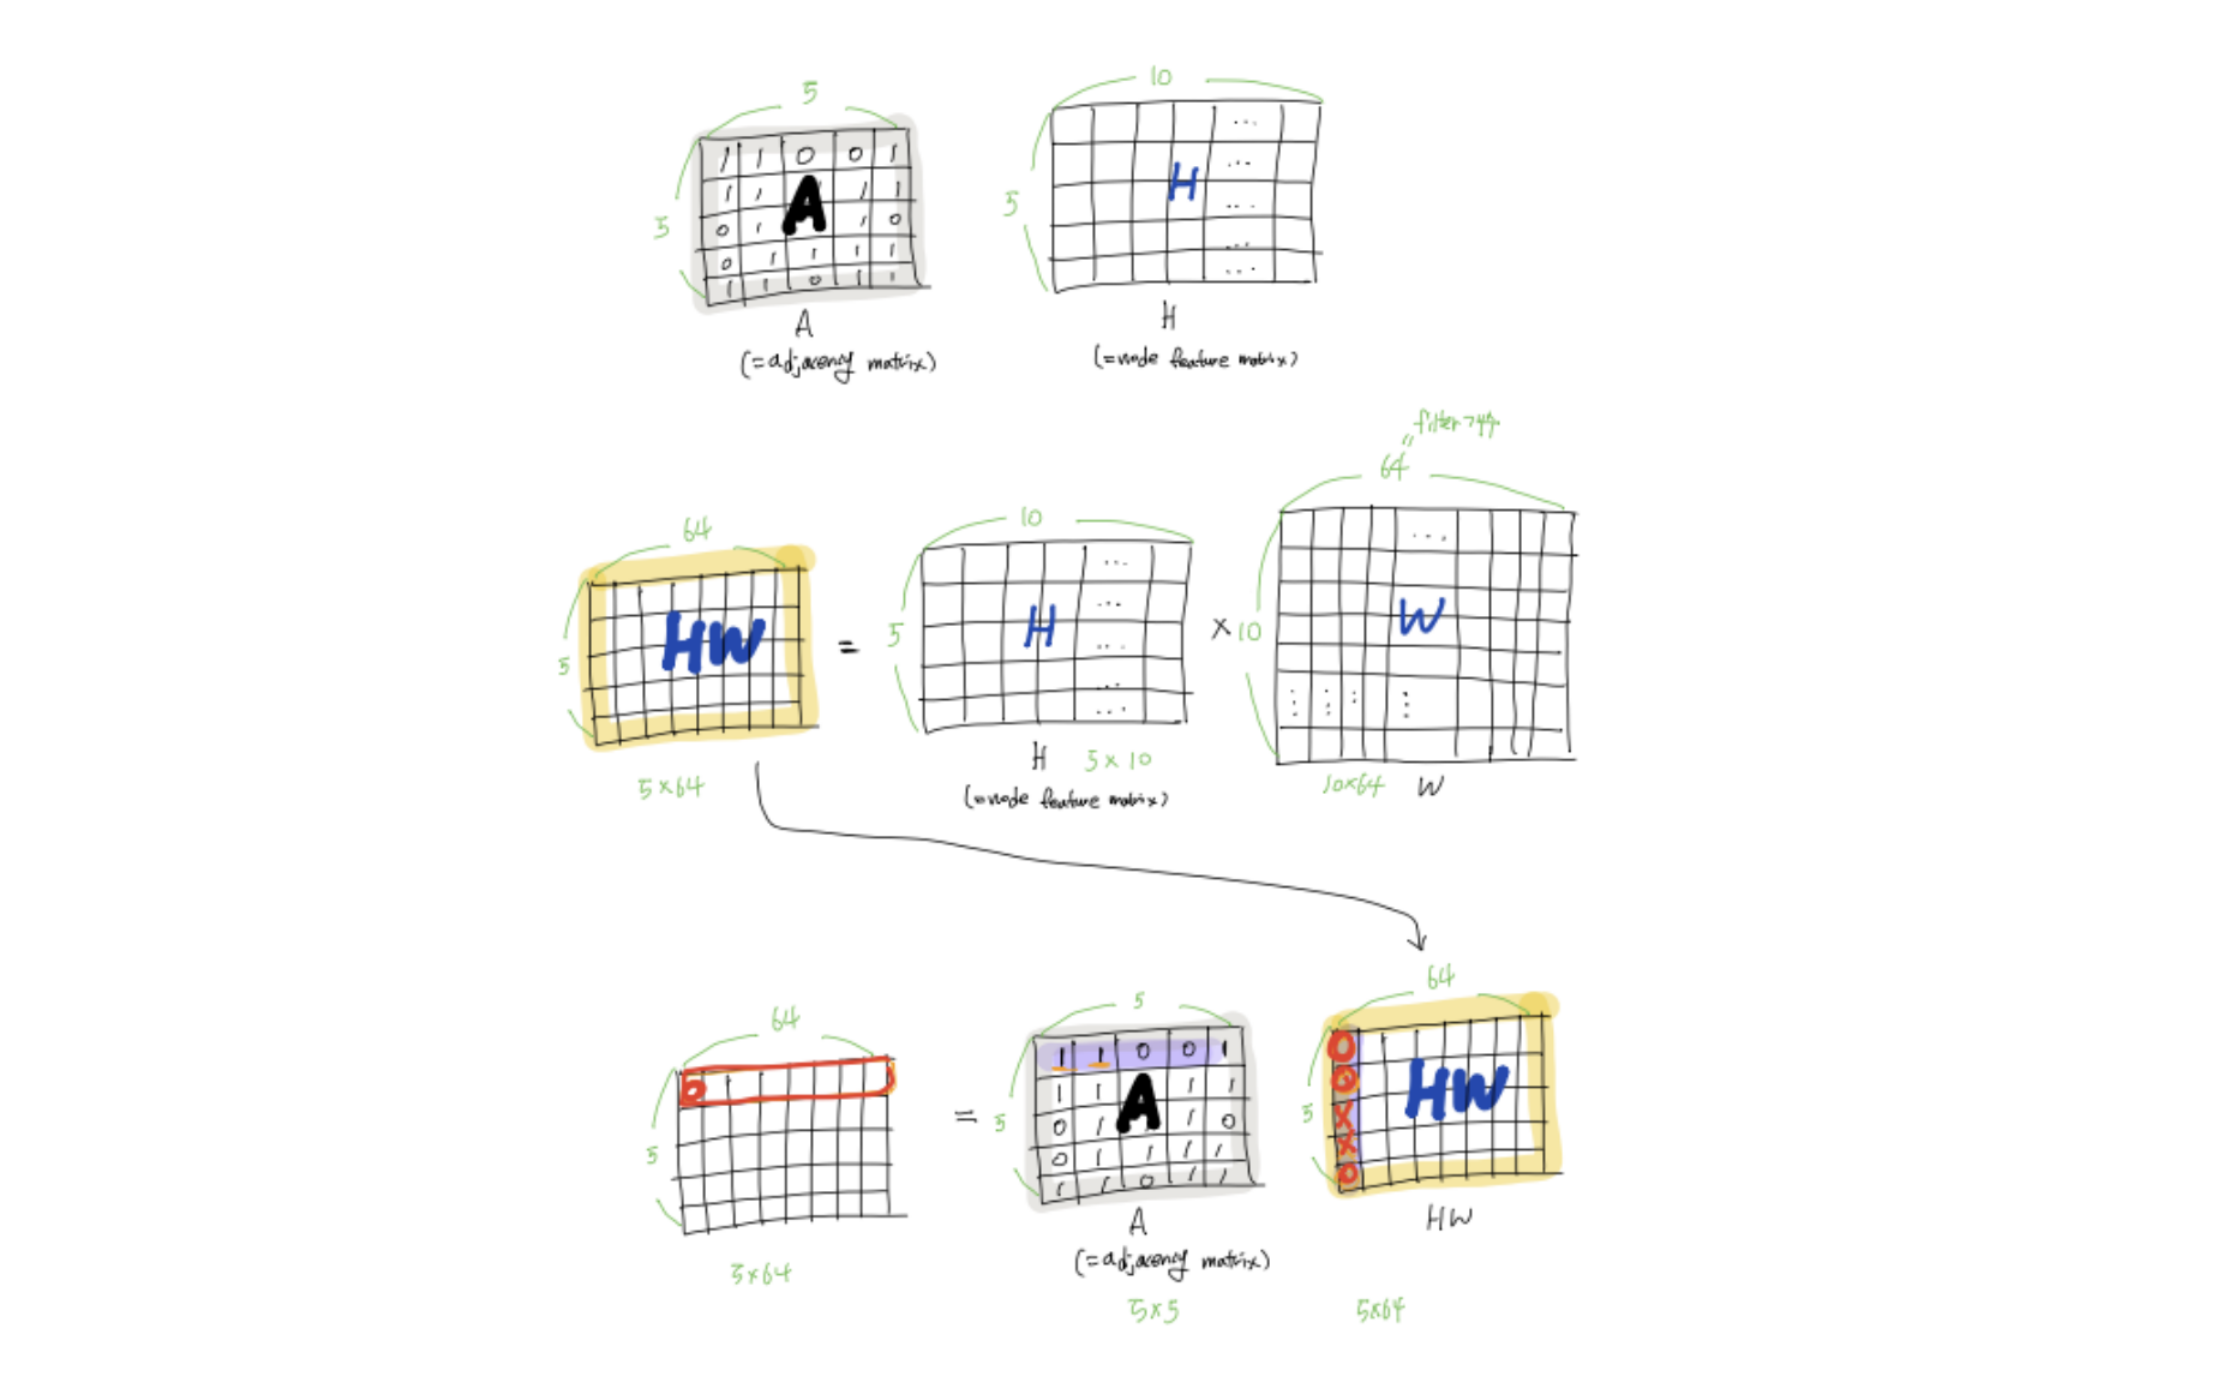

그 새로운 값은 각각의 노드의 근처에 있는 값들만 받아들여서 convolution 연산을 한 효과를 냈고, 그리고 그 weight들은 다 똑같다. 그 weight를 곱할때 filter마다는 다르지만 동일한 하나의 필터 내에서는 같은 weight들이 서로 다른 노드에 곱해진다.

그래서 이런식으로 하면 weight sharing을 하고, local feature를 뽑아내는 convolutional layer의 특성을 가지면서도 for문을 돌고 하는게 아니라 행렬연산을 통해 이것을 구현 함으로써 GPU에 넣었을 때 훨씬 빠르고 gradient 계산하는 것도 병렬화되서 훨씬 빠르게 할 수 있기 때문에 이렇게 구현하면 쓸 수 있겠다고 생각해볼 수 있다. 

타당한 structure인 것 같다.

$$H^{(l+1)} = \sigma(AH^{(l)}W^{(l)}+b^{(l)})$$

다음 layer의 hidden state는  이전 layer의 hidden stat에  weight를 곱하고 여기에 adjacency matrix를 곱하면 그 connectivity에 들어가는 정보가 들어가서 각각의 노드가 연결되어 있는 애들의 정보만 받게되고, 이것도 어쨌든 컨볼루션을 했으니까 activation을 씌워주면 update된 값을 얻을 수 있다.

### Readout-Permutation Invariance
> Permutation invariance는 adjency matrix의 순서가 바뀌더라도 그 output이 변하지 않는 함수의 특성을 말한다.

$$f(PAP^{T}) = f(A)$$

(참고) 위 식에서 $\bf{A}$는 adjacency matrix, $\bf{P}$는 행과 열의 순서를 바꾸는 permutation matrix이다. 위 식은 위에서 설명한 것처럼 adjacency matrix 내의 노드의 순서가 바뀌어도 함수의 결과는 바뀌지 않는다.

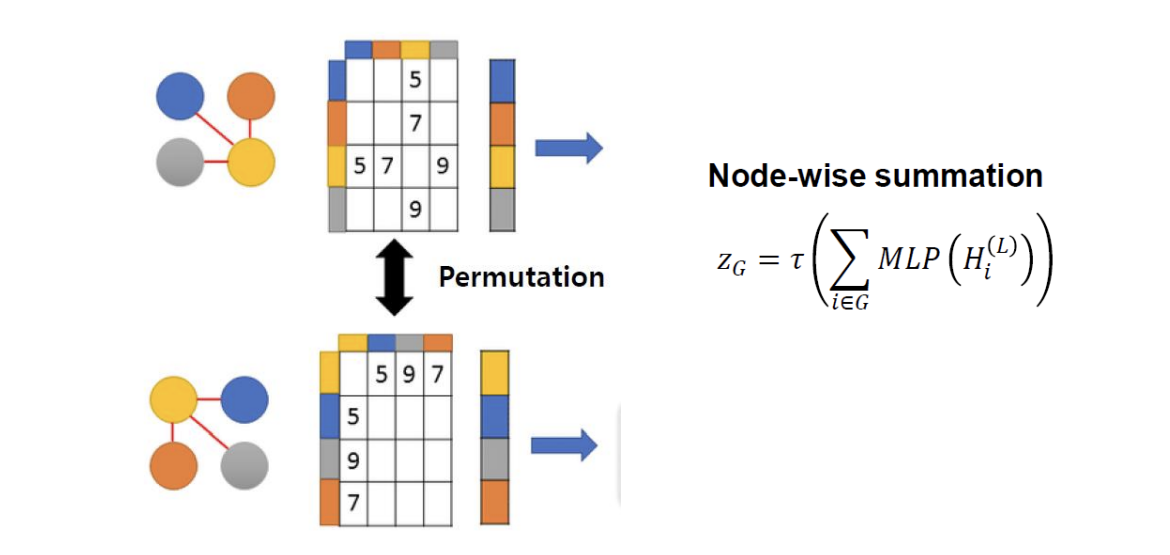

그래프를 adjacency matrix와 node feature matrix로 표현을 했는데 node feature matrix에 순서가 있다. 노드의 순서가 바뀐다고 해서 그래프가 달라지지는 않는다. 노드의 배치만 바뀌었을 뿐 노드의 특성과 엣지는 다 똑같이 연결되어 있으니까 같은 그래프이다.그런데 우리가 표현하는 node feature matrix는 바뀌게 될것이다. (row의 순서가 뒤죽박죽..)근데 결국 얘네들은 같은 그래프이니까 feature를 뽑아낼 때 같은 값이 나와야 된다. (순서가 다르게되어 있다고 다른값이 나오면 안되겠죠) 따라서 이걸 하기 위해서 Readout layer를 거치게 된다.


이 Readout layer의 역할은 permutation invariance를 준다. 즉, permutation이 어떻게 되어있든 관계없이 invariance하게 하는 역할을 수행해준다. 다양한 방법이 있지만 가장 간단한 방법은 위와 같다.

## Overall Structure of GCN

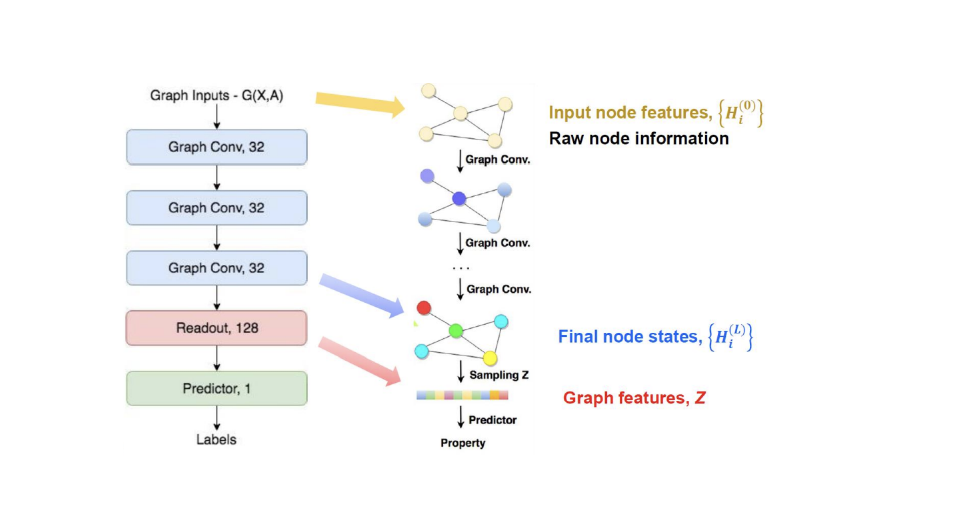

GCN을 거친 후 마지막에 Readout layer를 통해 최종적으로 classification 혹은 value를 regression한다.
CNN에서 Conv-pool layer들을 거친 후 마지막에 모든 node들 정보를 취합하기 위해 FC-layer를 거친 후 softmax를 통해 classification작업을 수행한다. 

마찬가지로 Graph Neural Network에서도 graph convolution layer들을 거친 후 MLP로 모든 node 정보를 취합하고 최종적으로 regression 혹은 classification을 위해 어떤 값을 결정짓는 작업이 필요하다. 이를 GCN에서 readout-layer라고 한다

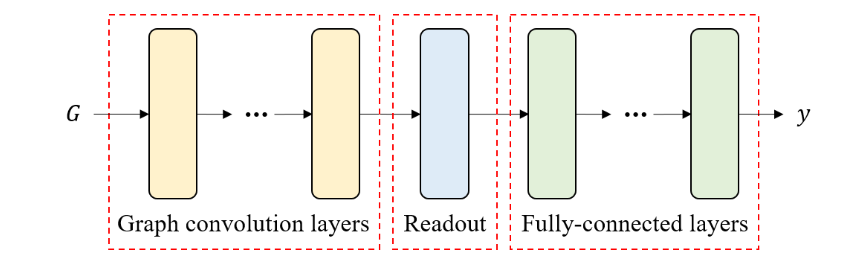

## Implementation

GCN을 비롯한 graph neural network (GNN)을 직접 구현하는 것은 인접 행렬과 node feature matrix를 추출하는 것부터 여러 그래프의 batch를 만드는 것 까지 많은 어려움이 따른다. PyTorch를 기준으로는 Deep Graph Library (DGL)와 PyTorch Geometric이라는 라이브러리가 GNN과 이를 이용한 딥 러닝에 관한 여러 구현을 제공하고 있다.

##  ref
- https://tkipf.github.io/graph-convolutional-networks/
- https://untitledtblog.tistory.com/152